<a href="https://colab.research.google.com/github/Sagor0078/Deep-Learning/blob/main/NeuralNetwork_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# what is derivative 

import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
def f(x):
  return 3*x**2 - 4*x + 5

In [ ]:
 #!pip install latexify-py
import math 
import latexify
#Python package to compile a fragment of Python source code to a corresponding LATEX expression :(
@latexify.with_latex
def f(x):
  return 3*x**2 - 4*x + 5
f

In [ ]:
f(3.0)

20.0

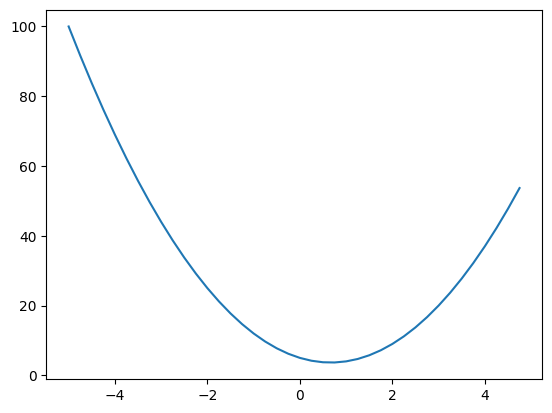

In [ ]:
xs = np.arange(-5,5,0.25)
ys = f(xs)
plt.plot(xs,ys)

In [ ]:
# what is derivative of this function ?



h = 0.000001
x = 2/3
(f(x+h)-f(x))/h

@latexify.with_latex
def slope(x,h):
  return (f(x+h)-f(x))/h
slope

In [ ]:
# lets more complex
h = 0.0001
#inputs
a = 2.0
b = -3.0
c = 10.0
d1 = a*b + c
b+=h;   # b will be bumped by h 
d2 = a*b + c
print('d1',d1)
print('d2',d2)
print('slope',(d2-d1)/h)

d1 4.0
d2 4.0002
slope 2.0000000000042206


In [ ]:
class Value:
  
  def __init__(self, data, _children=(), _op='', label=''):
    self.data = data
    self.grad = 0.0
    self._backward = lambda: None
    self._prev = set(_children)
    self._op = _op
    self.label = label

  def __repr__(self):
    return f"Value(data={self.data})"
  
  def __add__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data + other.data, (self, other), '+')
    
    def _backward():
      self.grad += 1.0 * out.grad
      other.grad += 1.0 * out.grad
    out._backward = _backward
    
    return out

  def __mul__(self, other):
    other = other if isinstance(other, Value) else Value(other)
    out = Value(self.data * other.data, (self, other), '*')
    
    def _backward():
      self.grad += other.data * out.grad
      other.grad += self.data * out.grad
    out._backward = _backward
      
    return out
  
  def __pow__(self, other):
    assert isinstance(other, (int, float)), "only supporting int/float powers for now"
    out = Value(self.data**other, (self,), f'**{other}')

    def _backward():
        self.grad += other * (self.data ** (other - 1)) * out.grad
    out._backward = _backward

    return out
  
  def __rmul__(self, other): # other * self
    return self * other

  def __truediv__(self, other): # self / other
    return self * other**-1

  def __neg__(self): # -self
    return self * -1

  def __sub__(self, other): # self - other
    return self + (-other)

  def __radd__(self, other): # other + self
    return self + other

  def tanh(self):
    x = self.data
    t = (math.exp(2*x) - 1)/(math.exp(2*x) + 1)
    out = Value(t, (self, ), 'tanh')
    
    def _backward():
      self.grad += (1 - t**2) * out.grad
    out._backward = _backward
    
    return out
  
  def exp(self):
    x = self.data
    out = Value(math.exp(x), (self, ), 'exp')
    
    def _backward():
      self.grad += out.data * out.grad # NOTE: in the video I incorrectly used = instead of +=. Fixed here.
    out._backward = _backward
    
    return out
  
  
  def backward(self):
    
    topo = []
    visited = set()
    def build_topo(v):
      if v not in visited:
        visited.add(v)
        for child in v._prev:
          build_topo(child)
        topo.append(v)
    build_topo(self)
    
    self.grad = 1.0
    for node in reversed(topo):
      node._backward()


a = Value(2.0,label = 'a')
b = Value(-3.0,label = 'b')
c = Value(10.0,label = 'c')
e = a*b;e.label = 'e'
d = e + c;d.label = 'd'
f = Value(8.0,label='f')
G = d*f;G.label = 'G'
G
  
# d._prev
#d._op

Value(data=32.0)

In [ ]:
# graphviz is a open source visualization software
from graphviz import Digraph

def trace(root):
  # builds a set of all nodes and edges in a graph
  nodes, edges = set(), set()
  def build(v):
    if v not in nodes:
      nodes.add(v)
      for child in v._prev:
        edges.add((child, v))
        build(child)
  build(root)
  return nodes, edges

def draw_dot(root):
  dot = Digraph(format='svg', graph_attr={'rankdir': 'LR'}) # LR = left to right
  
  nodes, edges = trace(root)
  for n in nodes:
    uid = str(id(n))
    # for any value in the graph, create a rectangular ('record') node for it
    dot.node(name = uid, label = "{%s | data %.4f | grad %.4f}" % (n.label,n.data,n.grad), shape='record')
    if n._op:
      # if this value is a result of some operation, create an op node for it
      dot.node(name = uid + n._op, label = n._op)
      # and connect this node to it
      dot.edge(uid + n._op, uid)

  for n1, n2 in edges:
    # connect n1 to the op node of n2
    dot.edge(str(id(n1)), str(id(n2)) + n2._op)

  return dot

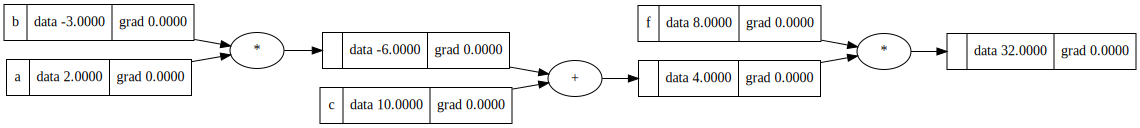

In [ ]:
draw_dot(G)

In [ ]:
#now we gonna run through backpropagation :( 

G.grad = 1.0
a.data += 0.01 * a.grad
b.data += 0.01 * b.grad
c.data += 0.01 * c.grad
f.data += 0.01 * f.grad

e = a * b
d = e + c
G = d * f

print(G.data)

32.0


[G = d*f]
dG/dd 
=(f(x+h)-f(x)) / h
=((d+h)*f - d*f) / h
=(d*f + h*f - d*f )/ h
= f


In [ ]:
def lol():
  
  h = 0.001
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  G = d * f; G.label = 'G'
  G1 = G.data
  
  a = Value(2.0, label='a')
  b = Value(-3.0, label='b')
  b.data += h
  c = Value(10.0, label='c')
  e = a*b; e.label = 'e'
  d = e + c; d.label = 'd'
  f = Value(-2.0, label='f')
  G = d * f; G.label = 'G'
  G2 = G.data
  
  print((G2 - G1)/h)
  
lol()



-3.9999999999995595


In artificial neural networks, the activation function of a node defines the output of that node given an input or set of inputs.

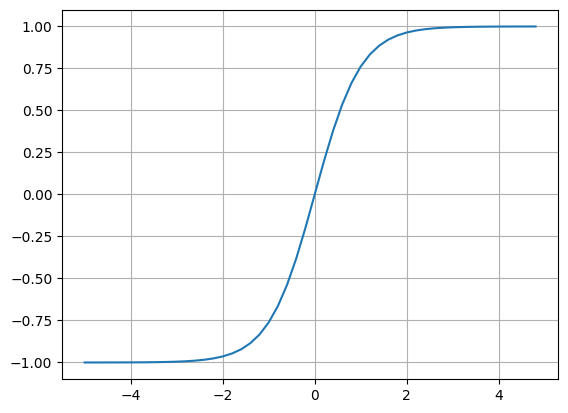

In [ ]:
# activation function Hyperbolic tangent(tanh) 
plt.plot(np.arange(-5,5,0.2), np.tanh(np.arange(-5,5,0.2))); plt.grid();

Cell body

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
o = n.tanh(); o.label = 'o'


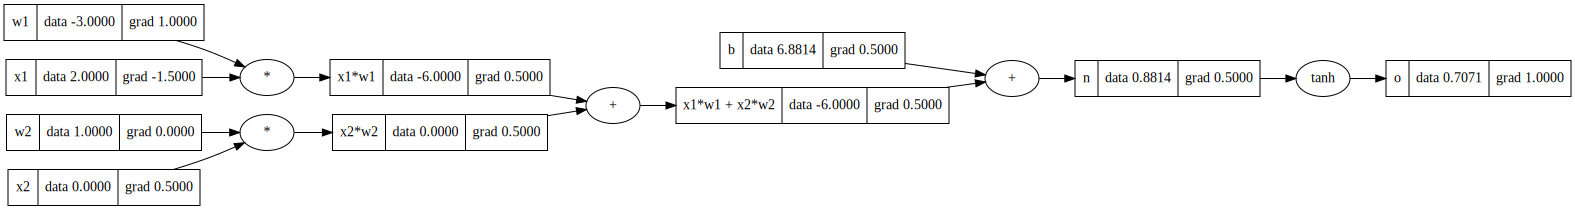

In [ ]:
draw_dot(o)

In [ ]:
o.backward()


**topological sorting**:
(why topo sort ? nueral net. is  directed graph and also didn't contain any loop or cycle)

In [ ]:

topo = []
visited = set()
def build_topo(v):
  if v not in visited:
    visited.add(v)
    for child in v._prev:
      build_topo(child)
    topo.append(v)
build_topo(o)
topo


[Value(data=6.881373587019543),
 Value(data=0.0),
 Value(data=1.0),
 Value(data=0.0),
 Value(data=2.0),
 Value(data=-3.0),
 Value(data=-6.0),
 Value(data=-6.0),
 Value(data=0.8813735870195432),
 Value(data=0.7071067811865476)]

In [ ]:
o.grad = 1.0 # intial grad of o level is 1.0 (base case)

In [ ]:

o._backward() # through backward to calculate gradient discent

In [ ]:
n._backward()

In [ ]:
b._backward()

In [ ]:
x1w1x2w2._backward()

In [ ]:
x2w2._backward()
x1w1._backward()

In [ ]:

x1.grad = w1.data * x1w1.grad
w1.grad = x1.data * x1w1.grad


In [ ]:
x1w1.grad = 0.5
x2w2.grad = 0.5


In [ ]:
n.grad = 0.5

In [ ]:
1 - o.data**2

0.4999999999999999

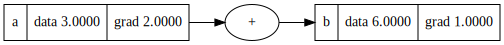

In [ ]:
a = Value(3.0, label='a')
b = a + a   ; b.label = 'b'
b.backward()
draw_dot(b)

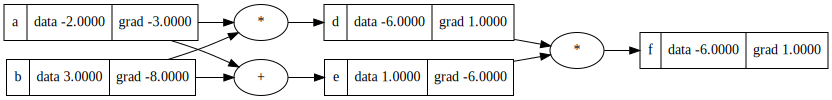

In [ ]:
a = Value(-2.0, label='a')
b = Value(3.0, label='b')
d = a * b    ; d.label = 'd'
e = a + b    ; e.label = 'e'
f = d * e    ; f.label = 'f'

f.backward()

draw_dot(f)

Andrej Karpathy micrograd works with only scaler value ;_;

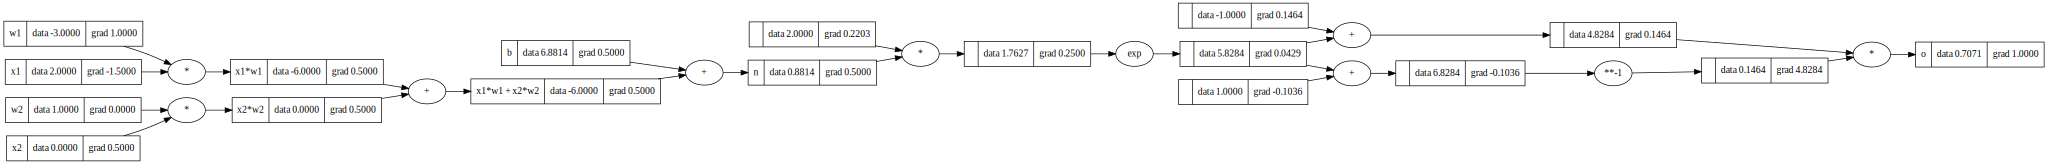

In [ ]:
# inputs x1,x2
x1 = Value(2.0, label='x1')
x2 = Value(0.0, label='x2')
# weights w1,w2
w1 = Value(-3.0, label='w1')
w2 = Value(1.0, label='w2')
# bias of the neuron
b = Value(6.8813735870195432, label='b')
# x1*w1 + x2*w2 + b
x1w1 = x1*w1; x1w1.label = 'x1*w1'
x2w2 = x2*w2; x2w2.label = 'x2*w2'
x1w1x2w2 = x1w1 + x2w2; x1w1x2w2.label = 'x1*w1 + x2*w2'
n = x1w1x2w2 + b; n.label = 'n'
# ----
e = (2*n).exp()
o = (e - 1) / (e + 1)
# ----
o.label = 'o'
o.backward()
draw_dot(o)

**Implement Neural Networks with torch(PyTorch)**

In [ ]:
import torch
x1 = torch.Tensor([2.0]).double()         ;x1.requires_grad = True # tensor is the speacial type of data structure that calculate higher dimentional matrix operation 
x2 = torch.Tensor([0.0]).double()        ;x2.requires_grad = True
w1 = torch.Tensor([-3.0]).double()         ;w1.requires_grad = True
w2 = torch.Tensor([1.0]).double()         ;w2.requires_grad = True
b = torch.Tensor([7.86666666098]).double() ;b.requires_grad = True
n = x1*w1 + x2*w2 + b
o = torch.tanh(n);

print('data',o.data.item())
o.backward()
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

data 0.9532909786473439
---
x2 0.09123631002958929
w2 0.0
x1 -0.27370893008876784
w1 0.18247262005917858


In [ ]:
import random
class Neuron:
  
  def __init__(self, nin):
    self.w = [Value(random.uniform(-1,1)) for _ in range(nin)]
    self.b = Value(random.uniform(-1,1))
  
  def __call__(self, x):
    # w * x + b
    act = sum((wi*xi for wi, xi in zip(self.w, x)), self.b)
    out = act.tanh()
    return out
  
  def parameters(self):
    return self.w + [self.b]

class Layer:
  
  def __init__(self, nin, nout):
    self.neurons = [Neuron(nin) for _ in range(nout)]
  
  def __call__(self, x):
    outs = [n(x) for n in self.neurons]
    return outs[0] if len(outs) == 1 else outs
  
  def parameters(self):
    return [p for neuron in self.neurons for p in neuron.parameters()]

class MLP:
  
  def __init__(self, nin, nouts):
    sz = [nin] + nouts
    self.layers = [Layer(sz[i], sz[i+1]) for i in range(len(nouts))]
  
  def __call__(self, x):
    for layer in self.layers:
      x = layer(x)
    return x
  
  def parameters(self):
    return [p for layer in self.layers for p in layer.parameters()]


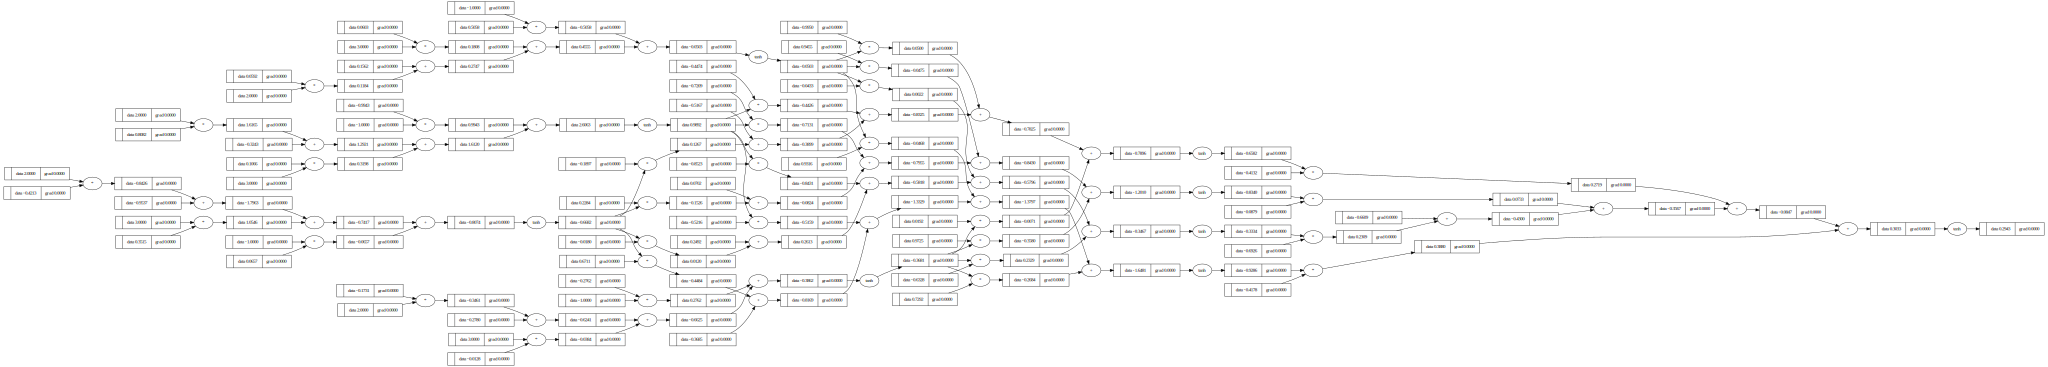

In [ ]:
x = [2.0, 3.0, -1.0]
n = MLP(3, [4, 4, 1])
n(x)
#draw_dot(n(x))

In [ ]:
xs = [
  [2.0, 3.0, -1.0],
  [3.0, -1.0, 0.5],
  [0.5, 1.0, 1.0],
  [1.0, 1.0, -1.0],
]
ys = [1.0, -1.0, -1.0, 1.0] # desired targets
ypred = [n(x) for x in xs]

In [ ]:
loss = sum((yout-ygt)**2 for ygt, yout in zip(ys,ypred))
# @latexify.with_latex
# def latexify_mse():
#     latex_eq = r'\text{MSE} = \frac{1}{n} \sum_{i=1}^{n}(y_i - \hat{y}_i)^2'
#     return latex_eq

# mse_latex = latexify_mse()
# print(mse_latex)


In [ ]:
loss

Value(data=2.51881267343542)

In [ ]:
loss.backward()

In [ ]:
n.layers[0].neurons[0].w[0].grad

-0.051713794900413994

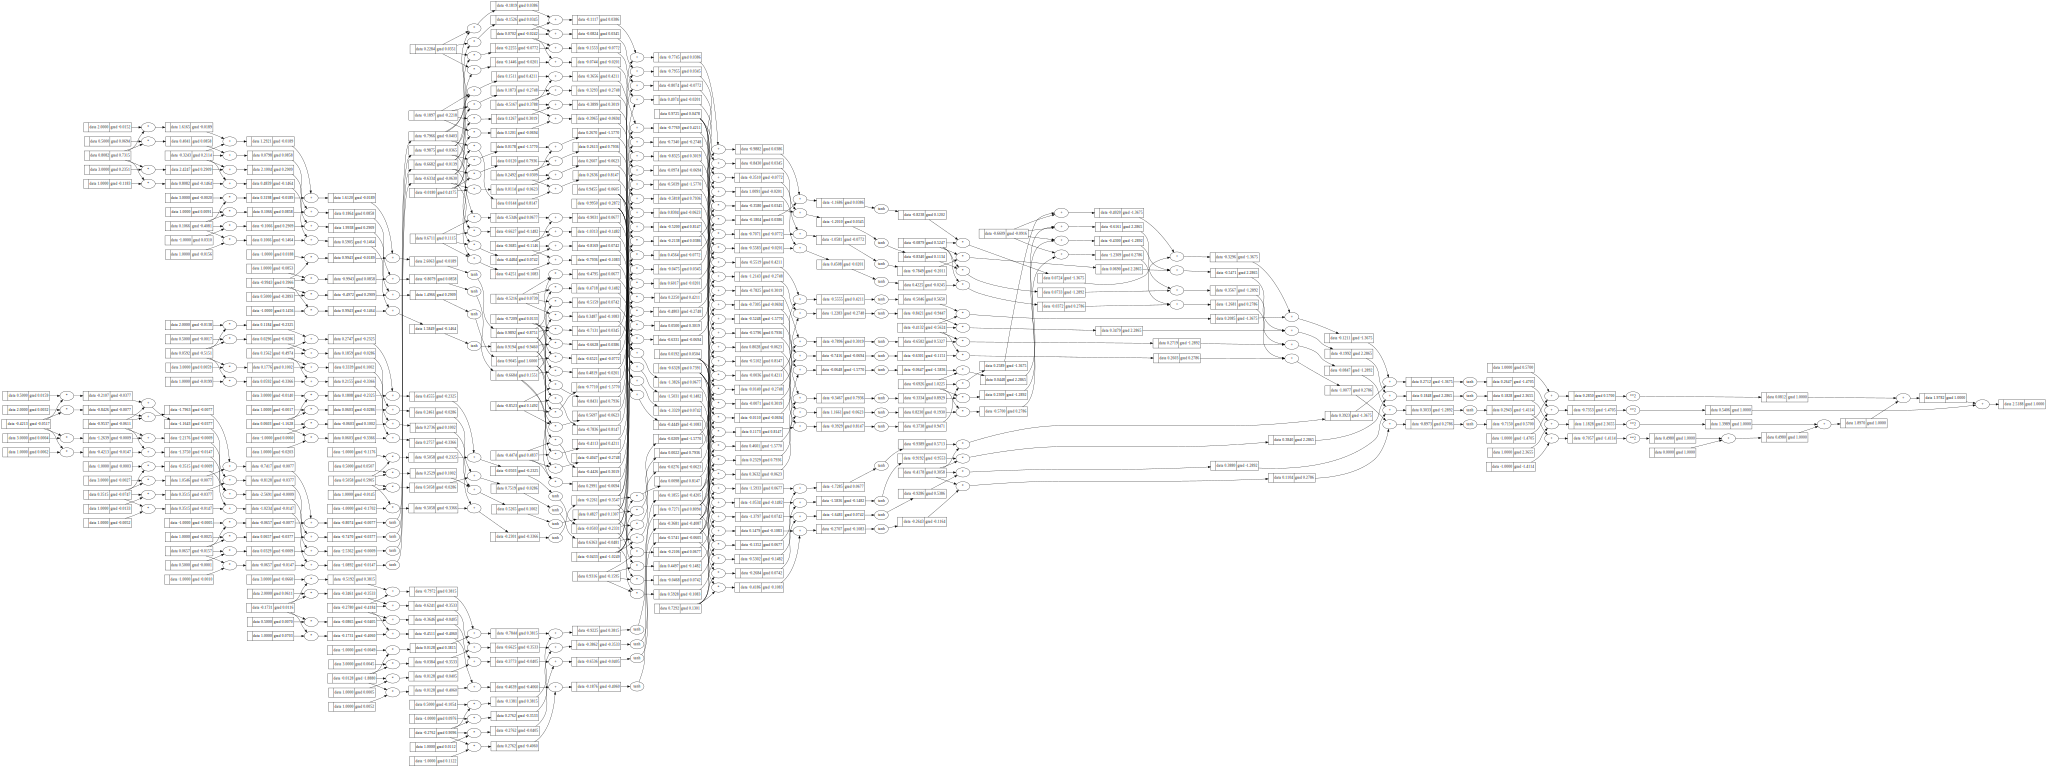

In [ ]:
 #draw_dot(loss)

In [ ]:
ypred

[Value(data=0.2942851658666987),
 Value(data=0.1827580857544871),
 Value(data=-0.714984649007313),
 Value(data=0.26472535294590527)]

In [ ]:
for k in range(20):
  
  # forward pass
  ypred = [n(x) for x in xs]
  loss = sum((yout - ygt)**2 for ygt, yout in zip(ys, ypred)) # mean squared loss function
  
  # backward pass
  for p in n.parameters():
    p.grad = 0.0
  loss.backward()
  
  # update
  for p in n.parameters():
    p.data += -0.1 * p.grad
  
  print(k, loss.data)
  

0 2.51881267343542
1 1.7441860535470017
2 1.0308495967170612
3 0.6965363721991086
4 0.19760932397062297
5 0.09985005057440355
6 0.0747172353201824
7 0.0614356773041037
8 0.05279104497296807
9 0.04652781340411653
10 0.041691269513825374
11 0.03779922690306715
12 0.03457695698670757
13 0.03185354207615923
14 0.029515362131479178
15 0.027482941145248085
16 0.02569843424616535
17 0.024118395776532645
18 0.02270935993140314
19 0.021445010984034847


In [ ]:
ypred

[Value(data=0.9289407822457122),
 Value(data=-0.915476509643039),
 Value(data=-0.9535650480000692),
 Value(data=0.9157671479360672)]